# Final Project of Introduction to Bioinformatics

## Comparative Mitochondrial Genomics and Phylogenetic Analysis

#### TA: Javad Razi (j.razi@outlook.com)

This task focuses on the comparative analysis of mitochondrial genomes from different species, primarily birds, mammals, and insects. The aim is to understand the evolutionary relationships between these species by analyzing and comparing their mitochondrial DNA, which is about 16,000 base pairs in length. You will use advanced computational methods to construct phylogenetic trees and delve into the ecological and anthropological insights that can be gleaned from this data. This project is designed to provide a comprehensive understanding of mitochondrial genomics, its importance in evolutionary biology, and its applications in broader scientific contexts.

You will learn:

- Techniques for aligning and comparing mitochondrial DNA sequences.
- How to construct and interpret phylogenetic trees using advanced computational methods.
- The application of mitochondrial genomics in understanding ecological interactions and human evolutionary history.

#### Task Roadmap

1. **Mitochondrial Genome Comparison**:
   - Align mitochondrial DNA sequences from the provided dataset.
   - Analyze these sequences to identify similarities and differences across species.

2. **Phylogenetic Analysis Using Advanced Methods**:
   - Apply Maximum Likelihood (ML) and Bayesian Inference methods, utilizing tools like `ETE Toolkit`, `DendroPy`, `BEAST`, or `PyRate`.
   - Compare the trees generated by these methods to understand how different approaches can lead to different interpretations of the data.

3. **Cross-Disciplinary Applications (Bonus)**:
   - **Ecology**: Examine how mitochondrial DNA analysis can reveal information about species adaptation, migration, and conservation. This involves understanding how genetic variation within and between species can inform ecological strategies and conservation efforts.
   - **Anthropology**: Investigate the use of mitochondrial DNA in tracing human evolution and migration patterns. This includes studying the mitochondrial DNA of mammals in your dataset to draw parallels with human evolutionary studies.

### Data Sources

The mitochondrial DNA data for birds, mammals, and insects will be provided to you. This dataset has been curated to facilitate a comprehensive comparative analysis and is essential for the completion of your phylogenetic studies.

### Useful Resources and Material

- [Mitochondrial DNA - Wikipedia](https://en.wikipedia.org/wiki/Mitochondrial_DNA): A general introduction to the structure, function, origin, and diversity of mitochondrial DNA, as well as its applications in various fields such as medicine, forensics, and anthropology.
- [Mitochondrial DNA Analysis: Introduction, Methods, and Applications](https://bioinfo.cd-genomics.com/mitochondrial-dna-analysis-introduction-methods-and-applications.html): An explanation of the basics of mitochondrial DNA sequencing, bioinformatics analysis, heteroplasmy, and advantages of mitochondrial DNA analysis over nuclear DNA analysis.
- [Phylogenetic Tree- Definition, Types, Steps, Methods, Uses - Microbe Notes](https://microbenotes.com/phylogenetic-tree/): A coverage of the concepts and methods of phylogenetic tree construction, including the types of phylogenetic trees, the steps involved in phylogenetic analysis, the main methods of phylogenetic inference, and the applications of phylogenetic trees in various disciplines.
- [Phylogenetics - Wikipedia](https://en.wikipedia.org/wiki/Phylogenetics): An overview of the field of phylogenetics, which is the study of the evolutionary history and relationships among or within groups of organisms. It also discusses the data sources, models, algorithms, software, and challenges of phylogenetic analysis.
- [ETE Toolkit](http://etetoolkit.org/): A Python library for manipulating, analyzing, and visualizing phylogenetic trees. It supports various formats, methods, and tools for phylogenetic analysis, such as alignment, tree inference, tree comparison, tree annotation, and tree visualization.
- [DendroPy](https://dendropy.org/): Another Python library for phylogenetic computing. It provides a comprehensive API for working with phylogenetic data structures, such as trees, characters, and networks. It also offers a rich set of functions for simulation, manipulation, analysis, and annotation of phylogenetic data.

### Exploration and Reflection

As we proceed with our analysis of mitochondrial DNA for phylogenetic tree construction, it is valuable to contemplate a few questions. These inquiries aim to facilitate a more thorough understanding of the roles and characteristics of mitochondrial DNA in the context of evolutionary biology:

1. **Maternal Inheritance and Its Implications**: How does the maternal inheritance of mitochondrial DNA simplify our understanding of evolutionary lineage compared to nuclear DNA, which undergoes recombination? What unique insights can this aspect provide in tracing the evolutionary history of species?

2. **Mutation Rate and Evolutionary Insights**: Mitochondrial DNA mutates at a faster rate than nuclear DNA. How does this characteristic make mtDNA a more sensitive tool for detecting recent evolutionary events and relationships among closely related species? Can you think of any specific scenarios or studies where this property of mtDNA has been particularly instrumental?

Reflect on these questions as you work through the project, and consider how the properties of mitochondrial DNA enhance its value and applicability in evolutionary biology and beyond. Provide your answer either in this notebook, or in your report (if you had one).



### Answers:

### Reflections on Mitochondrial DNA
### Maternal Inheritance and Its Implications
The maternal inheritance of mitochondrial DNA (mtDNA) simplifies our understanding of evolutionary lineage compared to nuclear DNA, which undergoes recombination. This aspect provides unique insights into tracing the evolutionary history of species, as it allows for a direct lineage tracing back through maternal lines, offering a clearer picture of evolutionary pathways without the complexities introduced by recombination seen in nuclear DNA.

### Mutation Rate and Evolutionary Insights
The higher mutation rate of mitochondrial DNA compared to nuclear DNA makes it a more sensitive tool for detecting recent evolutionary events and relationships among closely related species. This characteristic of mitochondrial DNA has been particularly instrumental in studies requiring fine-scale resolution to distinguish between closely related species or to trace recent evolutionary changes. Examples include human migration patterns and the evolution of species with rapid population expansions or contractions, where the mitochondrial DNA provides a high-resolution genetic marker for tracing lineage and evolutionary dynamics.

### Step 0: Installing Necessary Packages

In [1]:
import sys
import subprocess
import pkg_resources

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

REQUIRED_PACKAGES = [
    'biopython',
    'pandas',
    'numpy'
]

for package in REQUIRED_PACKAGES:
    try:
        dist = pkg_resources.get_distribution(package)
        print('{} ({}) is installed'.format(dist.key, dist.version))
    except pkg_resources.DistributionNotFound:
        print('{} is NOT installed'.format(package))
        install(package)
        print('{} was successfully installed.'.format(package))

biopython (1.81) is installed
pandas (2.0.3) is installed
numpy (1.24.3) is installed


In [2]:
# Import necessary libraries. 
import pandas as pd
import numpy as np
import requests
from Bio import Entrez
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

### Step 1: Dataset Expansion

Our first task is to augment our dataset with additional species. This involves engaging with the NCBI database to retrieve mitochondrial DNA sequences.

#### Instructions:

- **Species Selection**: Identify and choose 10 additional species to include in your dataset. Aim for a diverse selection to enrich your phylogenetic analysis.

- **Querying NCBI Database**: Use the NCBI database to locate mitochondrial DNA sequences for your chosen species. While you can manually search on the [NCBI website](https://www.ncbi.nlm.nih.gov/), consider automating this process through their API for a more efficient approach.
    - **Example Query**: As a starting point, you might use a query like `"mitochondrion[Filter] AND (your_species_name[Organism])` to find specific mtDNA sequences. Adjust the query parameters according to your species selection.
    - **Documentation**: Familiarize yourself with the [NCBI API documentation](https://www.ncbi.nlm.nih.gov/books/NBK25497/) for detailed guidance on constructing queries.

- **Using NCBI Website**: You are welcome to use the NCBI website for this task. If you do so, document each step of your process clearly in your task report. This should include the species names, search terms used, and how you determined the relevant sequences to include.

- **Bonus Opportunity**: Implementing an automated, methodological approach using the NCBI API and relevant Python packages to add all 10 records in your dataset will earn you a 50% bonus for this section. Your method should be structured and replicable, demonstrating a systematic approach to data collection.

Remember, the goal is to methodically expand your dataset with relevant mtDNA sequences, paving the way for insightful phylogenetic analysis.

In [6]:
dataset = pd.read_csv('./dataset/species.csv')

print(dataset.head())

   taxo_id                 specie blast_name genbank_common_name  \
0     8945  Eudynamys scolopaceus      birds          Asian koel   
1     7460         Apis mellifera       Bees           honey bee   
2    36300      Pelecanus crispus      birds   Dalmatian pelican   
3    10116      Rattus norvegicus    Rodents          Norway rat   
4     9031          Gallus gallus      birds       Gallus gallus   

  accession_number                                              mtDNA  
0        NC_060520  https://www.ncbi.nlm.nih.gov/nucleotide/NC_060...  
1        NC_051932  https://www.ncbi.nlm.nih.gov/nucleotide/NC_051...  
2         OR620163    https://www.ncbi.nlm.nih.gov/nuccore/OR620163.1  
3        NC_001665     https://www.ncbi.nlm.nih.gov/nuccore/NC_001665  
4        NC_006088   https://www.ncbi.nlm.nih.gov/nuccore/NC_053523.1  


In [7]:
# Add 10 more species to your dataset
# for species in additional_species:
    # Fetch mtDNA and add to the dataset

# List of 10 additional species to add
additional_species = [
    "Panthera leo", # African Lion - A symbol of strength and social structure among felines.
    "Physeter macrocephalus", # Sperm Whale - The largest toothed whale, known for deep-sea diving.
    "Chelonia mydas", # Green Sea Turtle - Marine reptiles important for oceanic health.
    "Dendrobates auratus", # Green Poison Dart Frog - Brightly colored amphibian with toxic skin.
    "Ara macao", # Scarlet Macaw - Vibrant rainforest bird, known for intelligence.
    "Ursus maritimus", # Polar Bear - Largest land carnivore, indicator of Arctic ecosystem health.
    "Carcharodon carcharias", # Great White Shark - Apex predator of the oceans, famous in media.
    "Ginkgo biloba", # Ginkgo Tree - A living fossil with unique fan-shaped leaves.
    "Bombus terrestris", # Buff-tailed Bumblebee - Important pollinator with a distinctive buzz.
    "Pan troglodytes", # Common Chimpanzee - Our closest living relatives, known for complex social behavior.
]
Entrez.email = "ahmadreza1380.hamzei@gmail.com"

# Function to fetch mtDNA sequence ID for a species
def fetch_species_details(species_name):
    """
    Fetches details for a given species by querying NCBI's database.
    Returns a dictionary with the required information.
    """
    search_term = f"{species_name}[Organism] AND mitochondrion[Filter]"
    handle = Entrez.esearch(db="nucleotide", term=search_term, retmax=1)
    record = Entrez.read(handle)
    handle.close()
    
    if record['IdList']:
        accession_id = record['IdList'][0]
        # Fetch detailed record for the accession number
        handle = Entrez.efetch(db="nucleotide", id=accession_id, rettype="gb", retmode="xml")
        records = Entrez.read(handle)
        handle.close()
        
        details = {}
        # Extracting details from the fetched record
        # Note: This is a simplified example. You might need to adjust parsing based on actual record structure
        for record in records[0]['GBSeq_feature-table']:
            if record['GBFeature_key'] == 'source':
                for qualifier in record['GBFeature_quals']:
                    if qualifier['GBQualifier_name'] == 'db_xref':
                        # Extracting taxo_id
                        taxo_id = qualifier['GBQualifier_value'].split(":")[1]
                        details['taxo_id'] = taxo_id
                    if qualifier['GBQualifier_name'] == 'organism':
                        # Extracting species name
                        details['specie'] = qualifier['GBQualifier_value']
                        # Assuming genbank_common_name is the same as species name
                        details['genbank_common_name'] = qualifier['GBQualifier_value']
        taxonomy = records[0]['GBSeq_taxonomy'].split('; ')
        if taxonomy:
            # This is a simplistic approach; you might need a more sophisticated method to infer the blast name
            details['blast_name'] = taxonomy[-1]  # Using the highest taxonomic classification as a placeholder
        # Accession number and mtDNA URL construction
        details['accession_number'] = records[0]['GBSeq_primary-accession']
        details['mtDNA'] = f"https://www.ncbi.nlm.nih.gov/nuccore/{records[0]['GBSeq_accession-version']}"

        return details

# Save the expanded dataset
# dataset.to_csv('./dataset/expanded_dataset.csv', index=False)

# Initialize your dataset
new_rows = []

# Iterate over the list of additional species
for species in additional_species:
    details = fetch_species_details(species)
    if details:
        new_rows.append(details)

new_species_df = pd.DataFrame(new_rows)
expanded_dataset = pd.concat([dataset, new_species_df], ignore_index=True)

# Save the expanded dataset
expanded_dataset.to_csv('./dataset/expanded_dataset.csv', index=False)

### Step 3: Sequence Download and Preparation

The next step in our project involves downloading the mitochondrial DNA sequences for each species and preparing them for analysis.

#### Instructions:

- **Download mtDNA Sequences**: Write a script to download the mtDNA sequences from the links provided in your dataset. The sequences should be in FASTA format, which is the standard for nucleotide sequences.

- **Sequence Labeling**: Properly label each sequence within the FASTA file. This header, starting with '>', should include the species name and any other relevant information (e.g., `>Eudynamys_scolopaceus_NC_060520`). This is crucial for identifying the sequences in subsequent analysis.

- **Concatenate Sequences**:
    - Create a script to concatenate all downloaded sequences into a single `.fasta` or `.fna` file. 
    - Ensure each sequence in the file is clearly separated by its header line, which is important for differentiating the sequences of various species.

#### Tips for Writing the Download and Concatenation Script:
- Use Python libraries such as `httpx` or `requests`, or any other tool you prefer for downloading sequences. For processing FASTA files you can use a wide range of tools. One recommended option is `Biopython` library.
- Use a loop to go through each link in the dataset, download the sequence, and append it to your concatenated file.
- Maintain the format integrity of the FASTA file, ensuring each sequence is correctly associated with its header.


In [ ]:
# Write a function to download mtDNA sequences
import os
output_directory = "./fasta"

def download_mtDNA(accession_id, species_name):
    """
    Download mtDNA sequence using Entrez and save it in a labeled FASTA file.
    """
    try:
        # Fetch the sequence using Entrez
        handle = Entrez.efetch(db="nucleotide", id=accession_id, rettype="fasta", retmode="text")
        sequence_data = handle.read()
        handle.close()

        # Remove extra '>' characters and format the header line correctly
        sequence_lines = sequence_data.split('\n')
        formatted_sequence_data = "\n".join([*sequence_lines[1:]])
        
        # Create a SeqRecord object
        formatted_sequence_data = formatted_sequence_data.replace('\n', '')
        seq_record = SeqRecord(Seq(formatted_sequence_data), id=f"{species_name}_{accession_id}", description="")

        # Save the sequence in a labeled FASTA file
        output_filename = os.path.join(output_directory, f"{species_name}_{accession_id}.fasta")
        with open(output_filename, "w") as output_handle:
            print(seq_record)
            SeqIO.write(seq_record, output_handle, "fasta")

        print(f"Downloaded and saved {output_filename}")
    except Exception as e:
        print(f"Failed to download sequence for {species_name} ({accession_id}): {str(e)}")

# Loop through the dataset and download each mtDNA sequence
# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)
## Load dataset
dataset = pd.read_csv('./dataset/expanded_dataset.csv')

# List to hold downloaded sequences
# Loop through the dataset and download/save each mtDNA sequence
for index, row in dataset.iterrows():
    species_name = row['specie'].replace(' ', '_')
    download_mtDNA(row['accession_number'], species_name)

In [15]:
# Concatenate sequences into a single FASTA file
output_concatenated_filename = "./concatenated_sequences.fasta"
with open(output_concatenated_filename, "w") as concatenated_handle:
    for filename in os.listdir(output_directory):
        if filename.endswith(".fasta"):
            file_path = os.path.join(output_directory, filename)
            with open(file_path, "r") as individual_handle:
                concatenated_handle.write(individual_handle.read())

print(f"Concatenated sequences saved as {output_concatenated_filename}")

Concatenated sequences saved as ./concatenated_sequences.fasta


### Step 4: Sequence Alignment

After downloading the mitochondrial DNA sequences, the next critical step is their alignment. This process allows us to compare the sequences and discern the evolutionary relationships among the species.

#### Instructions:

- **Select an Alignment Tool**: Choose one of the following alignment tools based on your project needs. Each tool has its strengths and is widely used in bioinformatics for multiple sequence alignment.

1. **MAFFT**:
    - **Brief Introduction**: MAFFT (Multiple Alignment using Fast Fourier Transform) is renowned for its speed and efficiency, particularly suitable for large datasets.
    - **Resources**:
        - [MAFFT Official Documentation](https://mafft.cbrc.jp/alignment/software/)
        - [Example Usage on GitHub](https://github.com/MountainMan12/SARS-Cov2-phylo)
        - [Relevant Notebook](https://colab.research.google.com/github/pb3lab/ibm3202/blob/master/tutorials/lab03_phylo.ipynb)

2. **Clustal Omega**:
    - **Brief Introduction**: Clustal Omega offers high-quality alignments and is user-friendly, ideal for those new to sequence alignment.
    - **Resources**:
        - [A Python wrapper around Clustal Omega](https://github.com/benchling/clustalo-python)
        - [Clustal Omega Official Website](http://www.clustal.org/omega/)

3. **MUSCLE**:
    - **Brief Introduction**: MUSCLE (Multiple Sequence Comparison by Log-Expectation) is known for its balance between speed and accuracy, making it a versatile choice for various datasets.
    - **Resources**:
        - [MUSCLE Documentation](https://drive5.com/muscle5/manual/)

- **Perform Sequence Alignment**: Utilize your chosen tool to align the downloaded mtDNA sequences. This alignment is foundational for the accurate construction of phylogenetic trees.

- **Save Aligned Sequences**: After alignment, save the output in an appropriate format for further analysis in the subsequent steps of this project.

In [4]:
# Install and import the alignment tool
# sudo apt-get install mafft
from Bio.Align.Applications import MafftCommandline

# Perform the sequence alignment
def perform_alignment(input_file, output_file):
    """
    Perform multiple sequence alignment using MAFFT.
    
    :param input_file: Path to the input FASTA file containing sequences to align.
    :param output_file: Path to the output file to save the aligned sequences.
    """
    try:
        # Create a MAFFT command line object
        mafft_cline = MafftCommandline(input=input_file, thread=1)

        # Run MAFFT alignment
        stdout, stderr = mafft_cline()

        # Write the result into output file
        with open(output_file, "w") as handle:
            handle.write(stdout)
            print(f"Alignment completed. Aligned sequences saved in {output_file}")
        if stderr:
            print("Alignment failed due to:", stderr)
    except Exception as e:
        print(f"Error during alignment: {str(e)}")

# Align your downloaded sequences
# perform_alignment('path_to_downloaded_sequences.fasta', 'aligned_sequences.fasta')
# Define input and output file paths
input_file = './concatenated_sequences.fasta_part_2.fasta'  # Replace with your input file path
output_file = './aligned_sequences.fasta'  # Replace with your desired output file path

# Perform the sequence alignment
perform_alignment(input_file, output_file)

Alignment completed. Aligned sequences saved in ./aligned_sequences.fasta
Alignment failed due to: nthread = 1
nthreadpair = 1
nthreadtb = 1
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 2 ambiguous characters.

    1 / 10 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 

    0 / 10
done.

Progressive alignment 1/2... 

len1=16917, len2=346544, Switching to the memsave mode

STEP     1 / 9 (thread    0)mDP 00001 / 00001
STEP     2 / 9 (thread    0)m
STEP     3 / 9 (thread    0)m
STEP     4 / 9 (thread    0)m
STEP     5 / 9 (thread    0)m
STEP     6 / 9 (thread    0)m
STEP     7 / 9 (thread    0)m
STEP     8 / 9 (thread    0)m
STEP     9 / 9 (thread    0)m
done.

Making a distance matrix from msa.. 

    0 / 10 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 

    0 / 10
done.

Progressive alignment 2/2... 

STEP     1 / 9 (thread 

In [2]:
from Bio import SeqIO

def split_fasta(input_file, sequences_per_file):
    """Split a FASTA file into multiple smaller files.
    
    Args:
        input_file (str): Path to the input FASTA file.
        sequences_per_file (int): Number of sequences per output file.
    """
    with open(input_file, "r") as handle:
        sequences = list(SeqIO.parse(handle, "fasta"))
    
    for i in range(0, len(sequences), sequences_per_file):
        chunk = sequences[i:i + sequences_per_file]
        output_file = f"./split_fasta/{input_file}_part_{i//sequences_per_file + 1}.fasta"
        with open(output_file, "w") as output_handle:
            SeqIO.write(chunk, output_handle, "fasta")
        print(f"Written {len(chunk)} sequences to {output_file}")

# Example usage
split_fasta("concatenated_sequences.fasta", 10)  # Adjust the number of sequences per file as needed


Written 10 sequences to concatenated_sequences.fasta_part_1.fasta
Written 10 sequences to concatenated_sequences.fasta_part_2.fasta
Written 10 sequences to concatenated_sequences.fasta_part_3.fasta
Written 3 sequences to concatenated_sequences.fasta_part_4.fasta


### Step 5: Phylogenetic Tree Construction

The next phase in our project involves constructing phylogenetic trees to visualize and analyze the evolutionary relationships among the species. We will use three distinct methods, each providing unique insights.

#### Phylogenetic Tree Construction Methods:

1. **Bayesian Inference Trees**:
    - **Overview**: This method uses Bayesian statistics to estimate the likelihood of different evolutionary histories. It's particularly useful for its ability to estimate branch lengths and support values.
    - **Tools**: MrBayes, BEAST
        - MrBayes ([Official Website](https://nbisweden.github.io/MrBayes/manual.html/)) is widely recognized for its robustness in Bayesian inference.
        - BEAST2 ([BEAST Software](https://www.beast2.org/)) is another powerful tool, offering advanced features for complex evolutionary models.

2. **Maximum Likelihood Trees**:
    - **Overview**: Maximum Likelihood methods evaluate tree topologies based on the likelihood of observed data given a tree model. It's known for its statistical rigor and accuracy.
    - **Tools**: RAxML, PhyML
        - RAxML ([RAxML GitHub](https://github.com/stamatak/standard-RAxML)) is preferred for large datasets due to its efficiency.
        - PhyML ([PhyML Documentation](http://www.atgc-montpellier.fr/phyml/)) offers a balance of speed and accuracy, with a user-friendly interface.

3. **Neighbor-Joining Trees**:
    - **Overview**: The Neighbor-Joining method is a distance-based approach that constructs phylogenetic trees by evaluating the genetic distance between sequences. It is known for its speed and simplicity, making it well-suited for initial exploratory analyses.
    - **Tools**: 
        - MEGA: A versatile tool specifically used here for constructing Neighbor-Joining trees. It's recognized for its ease of use and effectiveness in phylogenetic analysis. [MEGA Software](https://www.megasoftware.net/)


NJ Tree constructed and saved in ./split_trees/concatenated_sequences.fasta_part_1.fasta_tree_nj.nwk
Warning, you specified a working directory via "-w"
Keep in mind that RAxML only accepts absolute path names, not relative ones!

RAxML can't, parse the alignment file as phylip file 
it will now try to parse it as FASTA file

RAxML output files with the run ID <ML_tree> already exist 
in directory /home/ahmadreza/ahmad/term9/bio/Project/Introduction-to-Bioinformatics-project/tasks/mitochondrial-comparison-phylogenetic-construction/ ...... exiting
Error during ML tree construction: Command '['raxmlHPC-PTHREADS-AVX', '-T', '4', '-f', 'a', '-x', '12345', '-p', '12345', '-N', '100', '-m', 'GTRGAMMA', '-s', '/home/ahmadreza/ahmad/term9/bio/Project/Introduction-to-Bioinformatics-project/tasks/mitochondrial-comparison-phylogenetic-construction/split_align/concatenated_sequences.fasta_part_1.fasta_aligned.fasta', '-n', 'ML_tree', '-w', '/home/ahmadreza/ahmad/term9/bio/Project/Introduction-to-B

<Figure size 1000x500 with 0 Axes>

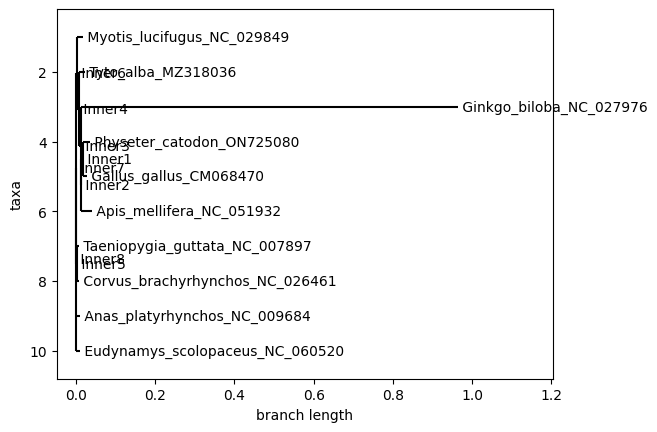

<Figure size 1000x500 with 0 Axes>

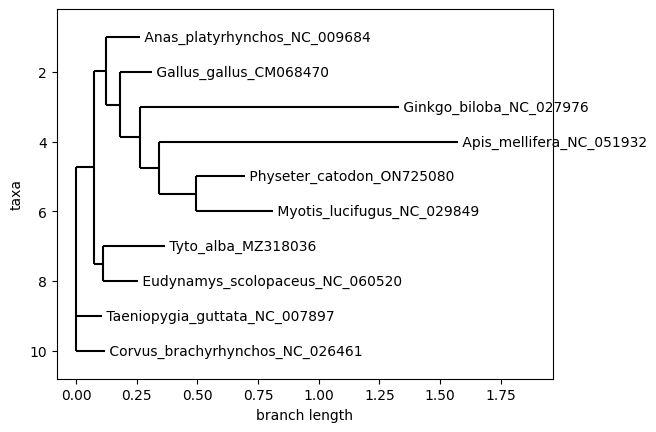

In [1]:
# Import necessary libraries for tree construction
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo
from Bio.Nexus import Nexus
import matplotlib.pyplot as plt
import subprocess, os
import shutil

# Construct a phylogenetic tree using the Neighbor Joining method
def construct_tree_NJ(aligned_sequences_path, output_file=None):
    """
    Construct a phylogenetic tree using the Neighbor Joining (NJ) method.

    :param aligned_sequences_path: Path to the input aligned sequences in FASTA format.
    :param output_file: Path to save the constructed NJ tree.
    """
    try:
        # Read the aligned sequences from the file
        alignment = AlignIO.read(aligned_sequences_path, "fasta")

        # Calculate the distance matrix
        calculator = DistanceCalculator('identity')
        dm = calculator.get_distance(alignment)

        # Construct the NJ tree
        constructor = DistanceTreeConstructor()
        tree = constructor.nj(dm)
        
        # Save the tree to a file if an output path is provided
        if output_file:
            Phylo.write(tree, output_file, "newick")
            print(f"NJ Tree constructed and saved in {output_file}")
        else:
            print("NJ Tree constructed.")

        return tree
    except Exception as e:
        print(f"Error during NJ tree construction: {str(e)}")
        return None


# Repeat the process for Maximum Likelihood and Supertree methods
def construct_tree_ML(input_alignment, output_tree):
    """
    Construct a Maximum Likelihood (ML) phylogenetic tree using RAxML.

    :param input_alignment: Path to the input aligned sequences in FASTA format.
    :param output_tree: Path to save the constructed ML tree.
    """
    try:
        # Define the RAxML command
        working_directory = working_directory = os.getcwd()
        raxml_cmd = [
            "raxmlHPC-PTHREADS-AVX",
            "-T", "4",  # Number of threads
            "-f", "a",  # Rapid Bootstrap Analysis and search for best-scoring ML tree in one program run
            "-x", "12345",  # Random seed for bootstrap
            "-p", "12345",  # Random seed for parsimony inferences
            "-N", "100",  # Number of bootstrap replicates
            "-m", "GTRGAMMA",  # Substitution model
            "-s", os.path.abspath(input_alignment),  # Input alignment file
            "-n", "ML_tree",  # Suffix for output files
            "-w", working_directory  # Working directory
        ]

        # Execute the RAxML command
        subprocess.run(raxml_cmd, check=True)
        
        # Adjust the source file name according to RAxML version and output
        source_file = f"{working_directory}/RAxML_bestTree.ML_tree"
        subprocess.run(["mv", source_file, output_tree], check=True)

        print(f"ML Tree constructed and saved in {output_tree}")
    except subprocess.CalledProcessError as e:
        print(f"Error during ML tree construction: {e}")

# Construct a phylogenetic tree using Bayesian Inference
def construct_tree_BI(input_alignment, output_prefix, output_directory="./"):
    """
    Construct a phylogenetic tree using Bayesian Inference with MrBayes,
    taking an input alignment file in FASTA format, and save the tree in a .nwk file
    within a specified output directory.
    """
    # Ensure the output directory exists
    os.makedirs(output_directory, exist_ok=True)
    
    # Generate the full path for the NEXUS file
    nexus_file_path = os.path.join(output_directory, f"{output_prefix}.nex")
    
    # Read the alignment from the FASTA file
    alignment = AlignIO.read(input_alignment, "fasta")
    
    # Open the NEXUS file for writing
    with open(nexus_file_path, 'w') as nexus_file:
        # Write the header for the NEXUS file
        nexus_file.write("#NEXUS\nbegin data;\n")
        nexus_file.write(f"dimensions ntax={len(alignment)} nchar={alignment.get_alignment_length()};\n")
        nexus_file.write("format datatype=dna missing=? gap=-;\nmatrix\n")
        
        # Write each sequence, ensuring no line exceeds the maximum length
        max_line_length = 80  # Adjust as needed
        for record in alignment:
            sequence = str(record.seq)
            nexus_file.write(record.id + " ")
            for i in range(0, len(sequence), max_line_length):
                nexus_file.write(sequence[i:i+max_line_length] + "\n")
            nexus_file.write("\n")
        nexus_file.write(";\nend;\n")
        
        # Append MrBayes block to the NEXUS file
        nexus_file.write("""
begin mrbayes;
   set autoclose=yes nowarn=yes;
   lset nst=6 rates=invgamma;
   mcmc ngen=1000000 samplefreq=100;
   sumt;
end;
""")

    try:
        # Change the current working directory to the output directory
        os.chdir(output_directory)
        
        # Define the MrBayes command
        mb_cmd = ["mb", nexus_file_path]
        
        # Execute the MrBayes command
        subprocess.run(mb_cmd, check=True, capture_output=True)
        
        print(f"Bayesian Inference tree construction completed. Check output files with prefix {output_prefix} in {output_directory}")
    except subprocess.CalledProcessError as e:
        print(f"Error during BI tree construction: {e}")

def draw_tree(tree_file):
    """
    Draw a phylogenetic tree using Phylo.draw.

    :param tree_file: Path to the tree file in Newick format.
    """
    # Read the tree from the file
    tree = Phylo.read(tree_file, "newick")
    
    # Set the size of the figure
    plt.figure(figsize=(10, 5))
    
    # Draw the tree
    Phylo.draw(tree)
    
    # Show the plot
    plt.show()

input_file = './split_align/concatenated_sequences.fasta_part_1.fasta_aligned.fasta'

output_file_nj = './split_trees/concatenated_sequences.fasta_part_1.fasta_tree_nj.nwk'
output_file_ml = './split_trees/concatenated_sequences.fasta_part_1.fasta_tree_ml.nwk'
output_file_bi = './split_trees/concatenated_sequences.fasta_part_1.fasta_tree_bi.nwk'

construct_tree_NJ(input_file, output_file_nj)
construct_tree_ML(input_file, output_file_ml)
# construct_tree_BI(input_file, './split_trees/concatenated_sequences.fasta_part_1.fasta_tree_bi')

draw_tree(output_file_nj)
draw_tree(output_file_ml)
# draw_tree(output_file_bi)

### Step 6: In-Depth Phylogenetic Tree Visualization

Having constructed phylogenetic trees using different methods, our next task is to visualize these trees effectively. This step is crucial for interpreting the results and communicating our findings.

#### Visualization Tools:

1. **FigTree**:
    - **Overview**: FigTree is designed for the graphical representation of phylogenetic trees. It's excellent for creating publication-ready visualizations.
    - **Resource**: [FigTree Tool](http://tree.bio.ed.ac.uk/software/figtree/)
    - **Usage**: Use FigTree to add detailed annotations, adjust branch colors, and format tree layouts for clear, interpretable visualizations.

2. **iTOL (Interactive Tree Of Life)**:
    - **Overview**: iTOL is a web-based tool for the display, annotation, and management of phylogenetic trees, offering extensive customization options.
    - **Resource**: [iTOL Website](https://itol.embl.de/)
    - **Usage**: Ideal for interactive tree visualizations. It allows users to explore different layers of data through their tree, such as adding charts or color-coding branches.

3. **Dendroscope**:
    - **Overview**: Dendroscope is a software program for viewing and editing phylogenetic trees, particularly useful for large datasets.
    - **Resource**: [Dendroscope Download](https://uni-tuebingen.de/fakultaeten/mathematisch-naturwissenschaftliche-fakultaet/fachbereiche/informatik/lehrstuehle/algorithms-in-bioinformatics/software/dendroscope/)
    - **Usage**: Utilize Dendroscope when dealing with large and complex trees or when you need to compare multiple trees side-by-side.

#### Task:

- **Visualize Each Tree**: Use one or more of the above tools to visualize the phylogenetic trees you constructed using Bayesian inference, maximum likelihood, and neighbor-joining methods.
- **Highlight Differences**: Focus on highlighting the differences and similarities between the trees obtained from the different methods. Pay attention to tree topology, branch lengths, and any notable patterns.
- **Interpretation and Presentation**: Aim for visualizations that are not only accurate but also interpretable and visually appealing. This will enhance the clarity of your work.

# Phylogenetic Tree Visualizations

This document presents the phylogenetic trees constructed using three different methods: Neighbor Joining, Maximum Likelihood, and Bayesian Inference. Each method's tree is visualized with two different tools: Phylo and iTOL.

## Visualized with Phylo

### Neighbor Joining Tree

![Phylo - Neighbor Joining Tree](./pics/Phylo_NJ.png)

Description: This image shows the phylogenetic tree constructed using the Neighbor Joining method, as visualized by the Phylo tool.

### Maximum Likelihood Tree

![Phylo - Maximum Likelihood Tree](./pics/Phylo_ML.png)

Description: This image shows the phylogenetic tree constructed using the Maximum Likelihood method, as visualized by the Phylo tool.

### Bayesian Inference Tree

![Phylo - Bayesian Inference Tree](path/to/your/phylo_bi_tree_image.png)

Description: This image shows the phylogenetic tree constructed using the Bayesian Inference method, as visualized by the Phylo tool.

## Visualized with iTOL

### Neighbor Joining Tree

![iTOL - Neighbor Joining Tree](./pics/iTOL_NJ.png)

Description: This image depicts the phylogenetic tree constructed using the Neighbor Joining method, as visualized by the iTOL tool.

### Maximum Likelihood Tree

![iTOL - Maximum Likelihood Tree](./pics/iTOL_ML.png)

Description: This image depicts the phylogenetic tree constructed using the Maximum Likelihood method, as visualized by the iTOL tool.

### Bayesian Inference Tree

![iTOL - Bayesian Inference Tree](path/to/your/itol_bi_tree_image.png)

Description: This image depicts the phylogenetic tree constructed using the Bayesian Inference method, as visualized by the iTOL tool.


### Cross-Disciplinary Applications (Optional)

This is an optional part with bonus, relative to the depth of your analysis. Refer to the first part of this notebook. You have complete freedom to do this part anyway you like, but to gain a portion of the bonus score for this section, a bare minimum effort is required.

### Conclusion and Reflective Insights

As we conclude our exploration of phylogenetic tree construction and analysis, let's reflect on the insights learned from this task and consider questions that emerge from our findings.

#### Interpretation of Results:

- Reflect on the phylogenetic trees produced by each method (Bayesian inference, maximum likelihood, and neighbor-joining). Consider how the differences in tree topology might offer varied perspectives on the evolutionary relationships among the species.

#### Questions to Ponder:

1. **Species Divergence**: Based on the trees, which species appear to have the most ancient divergence? How might this information contribute to our understanding of their evolutionary history?
   
2. **Common Ancestors**: Are there any unexpected pairings or groupings of species that suggest a closer evolutionary relationship than previously thought? How could this reshape our understanding of these species' evolutionary paths?

3. **Methodology Insights**: Considering the discrepancies between the trees generated by different methods, what might this tell us about the limitations and strengths of each phylogenetic analysis method?

4. **Conservation Implications**: Considering the evolutionary relationships revealed in your phylogenetic analysis, what insights can be gained for conservation strategies? Specifically, how could understanding the close evolutionary ties between species, which might be facing distinct environmental challenges, guide targeted conservation efforts?

<blockquote style="font-family:Arial; color:red; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>Don't forget to answer these questions!</strong>
</blockquote>
